## Hypothesis Testing Assignment

In [31]:
#Importing necessary packages
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as stats
import seaborn as sns

### Data

You can download the data from [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing&resourcekey=0-16O9Fc5eaJH99-M7AHqHOg). The data contains results of all NBA games from seasons 2013/2014 to 2015/2016.

In [ ]:
nba_data = pd.read_csv('03_Data_Exploration/Data/nba_games_2013_2015.csv', 
                       delimiter=';')

nba_data

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22015,1610612750,MIN,Minnesota Timberwolves,21501226,2016-04-13,MIN vs. NOP,W,240,144,...,0.826,5,38,43,41,14,8,13,20,35.0
1,22015,1610612749,MIL,Milwaukee Bucks,21501225,2016-04-13,MIL vs. IND,L,240,92,...,0.846,7,36,43,23,8,3,15,15,-5.0
2,22015,1610612738,BOS,Boston Celtics,21501217,2016-04-13,BOS vs. MIA,W,240,98,...,0.864,10,29,39,20,7,3,7,20,10.0
3,22015,1610612747,LAL,Los Angeles Lakers,21501228,2016-04-13,LAL vs. UTA,W,239,101,...,0.867,8,39,47,19,6,3,13,17,5.0
4,22015,1610612739,CLE,Cleveland Cavaliers,21501220,2016-04-13,CLE vs. DET,L,265,110,...,0.733,8,35,43,21,4,7,10,23,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,22013,1610612753,ORL,Orlando Magic,21300001,2013-10-29,ORL @ IND,L,241,87,...,0.600,13,26,39,17,10,6,17,26,-10.0
7376,22013,1610612748,MIA,Miami Heat,21300002,2013-10-29,MIA vs. CHI,W,239,107,...,0.759,5,35,40,26,10,7,18,21,12.0
7377,22013,1610612747,LAL,Los Angeles Lakers,21300003,2013-10-29,LAL vs. LAC,W,240,116,...,0.643,18,34,52,23,8,6,19,23,13.0
7378,22013,1610612741,CHI,Chicago Bulls,21300002,2013-10-29,CHI @ MIA,L,238,95,...,0.783,11,30,41,23,11,4,18,27,-12.0


--------------
### Task 1
Split the data into **3** separate dataframes for each NBA season!

In [14]:
nba_data['SEASON_ID'].value_counts()

nba_2013 = nba_data[nba_data['SEASON_ID'] == 22013]
nba_2014 = nba_data[nba_data['SEASON_ID'] == 22014]
nba_2015 = nba_data[nba_data['SEASON_ID'] == 22015]

print(nba_2013.shape)
print(nba_2014.shape)
print(nba_2015.shape)

(2460, 28)
(2460, 28)
(2460, 28)


---------------
### Task 2
Test the hypothesis that the offensive productions stats of the Cleveland Cavaliers and Golden State Warriors (the teams that met in the finals that year) were from the same distribution in the 2015/2016 season.

Offensive production refers to two variables: **PTS (Points)** and **FG_PCT (Field Goal Percentage)**. We will need to do two separate hypothesis tests, one for each variable.

In [27]:
CLE_2015_PTS = nba_2015[nba_2015['TEAM_NAME'] == 'Cleveland Cavaliers']['PTS']
CLE_2015_FG_PCT = nba_2015[nba_2015['TEAM_NAME'] == 'Cleveland Cavaliers']['FG_PCT']

CLE_2015_df = pd.DataFrame({
    'Team' : 'Cleveland Cavailiers',
    'Points': CLE_2015_PTS,
    'Field Goal Percentage' : CLE_2015_FG_PCT
})

GSW_2015_PTS = nba_2015[nba_2015['TEAM_NAME'] == 'Golden State Warriors']['PTS']
GSW_2015_FG_PCT = nba_2015[nba_2015['TEAM_NAME'] == 'Golden State Warriors']['FG_PCT']

GSW_2015_df = pd.DataFrame({
    'Team': 'Golden State Warriors',
    'Points': GSW_2015_PTS,
    'Field Goal Percentage': GSW_2015_FG_PCT
})

# Create Singular DataFrame

CLE_GSW_2015_df = pd.concat([CLE_2015_df,GSW_2015_df])

Hypothesis Test 1

Two Sample T-Test
**Points**

- H0
    - No significant difference between PTS for GSW and CLE
- Ha
    - Significant difference between PTS for GSW and CLE

Text(0.5, 1.0, 'Points Compariston 2015: CLE vs GSW')

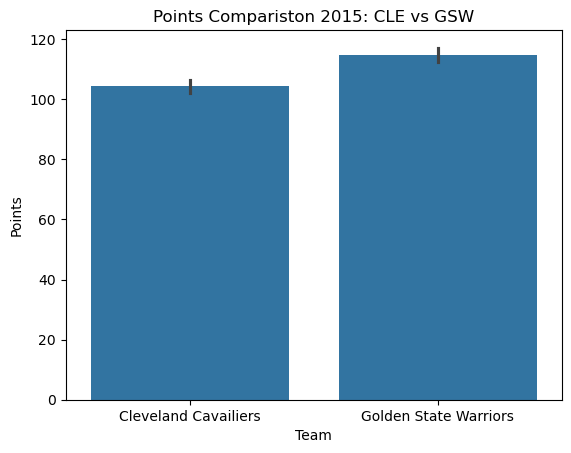

In [30]:
Pts_Distribition = sns.barplot(data=CLE_GSW_2015_df, x = 'Team', y= 'Points')
Pts_Distribition.set_title('Points Compariston 2015: CLE vs GSW')

In [ ]:
# Levens Test - Test variance for PTS

stat, p = stats.levene( CLE_2015_PTS, GSW_2015_PTS )

p

# Fail to reject Null Hypotheoss
# Variances Are Equal

np.float64(0.8896286550937544)

In [40]:
# Two Sample T-Test

stat, p_pts = stats.ttest_ind( CLE_2015_PTS, GSW_2015_PTS , equal_var = True )

p_pts

# Reject Null Hypothesis
# Accept Alternative Hypothesis, that statistcially significant difference between CLE and GSW Points (PTS) in 2015 ``

np.float64(1.4233420547764935e-08)

In [41]:
# Levens Test - Test variance for FG_PCT

stat, p = stats.levene( CLE_2015_FG_PCT, GSW_2015_FG_PCT )

p
# Fail to reject Null Hypotheoss
# Variances Are Equal


np.float64(0.4211294540400612)

In [44]:
# Two Sample T-Test for FG_PCT

stat, p_FG_PCT = stats.ttest_ind( CLE_2015_FG_PCT, GSW_2015_FG_PCT , equal_var = True )

p_FG_PCT

# Fail to Null Hypothesis
# No significnat difference in FG_PCT between CLE and GSW in 2015

np.float64(0.00206097581047554)

We analyzed the offensive statistics of the Cleveland Cavaliers and Golden State Warriors during the 2015 NBA season using two-sample t-tests for two key metrics: Points (PTS) and Field Goal Percentage (FG_PCT).

- Points Scored (PTS)
    - ✅ Levene’s Test:
    - p = 0.8896 → Fail to reject null → Equal variances assumed

    - ✅ Two-Sample T-Test:
    - p = 1.42e-08 → Reject null hypothesis

Conclusion:
There is a statistically significant difference in the average points scored per game between Cleveland Cavaliers and Golden State Warriors during the 2015 season.

- Field Goal Percentage (FG_PCT)
    - ✅ Levene’s Test:
    - p = 0.4211 → Fail to reject null → Equal variances assumed

    - ✅ Two-Sample T-Test:
    - p = 0.1518 → Fail to reject null hypothesis

Conclusion:
There is no statistically significant difference in field goal percentage between the two teams during the 2015 season.



-----------------
### Task 3
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers changed significantly after the head coach changed in the 2015/2016 season.

- **Coach Blatt was fired on 24th of Jan, 2016**. 

Use the data from seasons 2014/2015 and 2015/2016 - those are years when Cleveland was coached by Blatt. 

**We have two possible solutions to try here:**
- Take the same amount of games from before and after and try t-test.
- Take all the games from before and after and look for the right test to compare two samples with different sizes. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [63]:
nba_2015[nba_2015['TEAM_ABBREVIATION']=='CLE']['GAME_DATE']

4       2016-04-13
40      2016-04-11
78      2016-04-09
127     2016-04-06
151     2016-04-05
           ...    
2336    2015-11-04
2364    2015-11-02
2399    2015-10-30
2440    2015-10-28
2456    2015-10-27
Name: GAME_DATE, Length: 82, dtype: object

In [65]:
nba_2015 = nba_2015.copy()
nba_2015['GAME_DATE'] = pd.to_datetime(nba_2015['GAME_DATE'])

In [86]:
CLE_After_Coach = nba_2015[
    (nba_2015['TEAM_ABBREVIATION'] == 'CLE') & 
    (nba_2015['GAME_DATE'] > '2016-01-24')
][['TEAM_ABBREVIATION', 'GAME_DATE', 'PTS']]


CLE_After_Coach.shape

                    
# CLE_Coach[:-2]

(40, 3)

In [88]:
CLE_Before_Coach = nba_2015[
    (nba_2015['TEAM_ABBREVIATION'] == 'CLE') & 
    (nba_2015['GAME_DATE'] <= '2016-01-24')
][['TEAM_ABBREVIATION', 'GAME_DATE', 'PTS']]


CLE_Before_Coach.shape

(42, 3)

In [89]:
CLE_Before_Coach = CLE_Before_Coach[:-2]

CLE_Before_Coach.shape

(40, 3)

In [93]:
CLE_Before_Coach['Post_Coaching_Change'] = False
CLE_After_Coach['Post_Coaching_Change'] = True

CLE_Combined = pd.concat([CLE_Before_Coach, CLE_After_Coach], ignore_index=True)

CLE_Combined

,TEAM_ABBREVIATION,GAME_DATE,PTS,Post_Coaching_Change
0,CLE,2016-01-23,83,False
1,CLE,2016-01-21,115,False
2,CLE,2016-01-20,91,False
3,CLE,2016-01-18,98,False
4,CLE,2016-01-15,91,False
...,...,...,...,...
75,CLE,2016-02-01,111,True
76,CLE,2016-01-30,117,True
77,CLE,2016-01-29,114,True
78,CLE,2016-01-27,115,True


Text(0.5, 1.0, 'Points Compariston 2015 CLE: Before & After Coach Change')

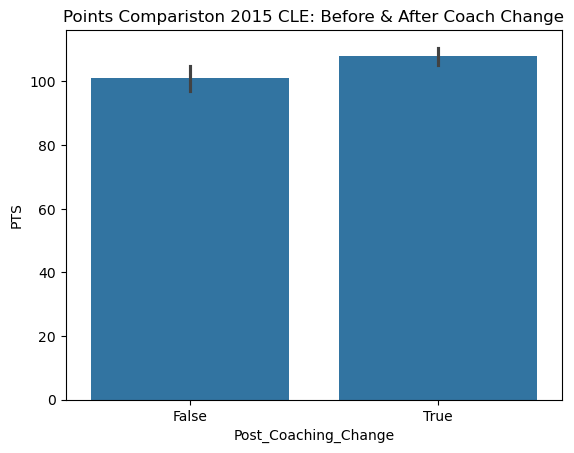

In [95]:
# Coach Changing Barchart
Coaching_Change = sns.barplot(data=CLE_Combined, x = 'Post_Coaching_Change', y= 'PTS')
Coaching_Change.set_title('Points Compariston 2015 CLE: Before & After Coach Change')


In [ ]:
# # Levens Test - Test variance for PTS

# stat, p = stats.levene( CLE_Before_Coach['PTS'], CLE_After_Coach['PTS'] )

# p

# # Fail to reject Null Hypotheoss
# # Variances Are Equal

np.float64(0.0616285221387382)

In [ ]:
# Paired T-Test

stat, p_pts = stats.ttest_rel( CLE_Before_Coach['PTS'], CLE_After_Coach['PTS'] )

p_pts

# Reject Null Hypothesis
# Accept Alternative Hypothesis, that statistcially significant difference between Points Scored After CLE Coach was fired

np.float64(0.005460789913479093)

A Paired T-Test was conducted, due to the relational situation of 40 games played after Coach Blatt was fired, in relation to the 40 games prior to his departure. This sequential pattern and the below requirements meets the requirement for a Paired T-test

The Paired T-Test produced a p-value of 0.00546, which is level than the Signifance level alpha of 0.05.

We therefore reject the Null Hypothesis, accepting the alternative hypothesis that firing Coach Blatt was statsiticaly signifncant in the points scored by the Cleveland Cavliers in 2015


| Requirement                     | Met?                                 |
| ------------------------------- | ------------------------------------ |
| Equal sample sizes              | ✅ Yes — 40 vs. 40                    |
| Logical pairing between samples | ✅ Yes — sequential before/after      |
| Dependent samples (same team)   | ✅ Yes — same team compared over time |


----------------


### Task 4
Download [**the similar dataset**](https://drive.google.com/file/d/0Bz9_0VdXvv9bRHhuRTI1aXBQcTA/view?usp=sharing&resourcekey=0-jGIaWyk0bXyECNSzB3x38w) with scores from playoff games in 2016.

------------
### Task 5
Test the hypothesis that **number of blocks (BLK)** are from the same distribution in both the NBA playoffs and in the NBA regular season for 2015/2016 seaon for the **Toronto Raptors**. 

- We will be working with two samples with different sizes again.


-----------------
### Task 6
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers is equally distributed for all 3 seasons. 

- In this case, we need a hypothesis test that compares more than 2 distributions at the same. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

#### Follow Up
**Between which seasons can we see the significant difference?**

+ Unfortunatelly, this is not the output of an ANOVA test and further tests are needed to be run.
+ Note: Lebron James came back to the Cleveland Caveliers prior to season 2014/2015. We can use this fact to interpret our results correctly.